# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
data = pd.read_csv('../data/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


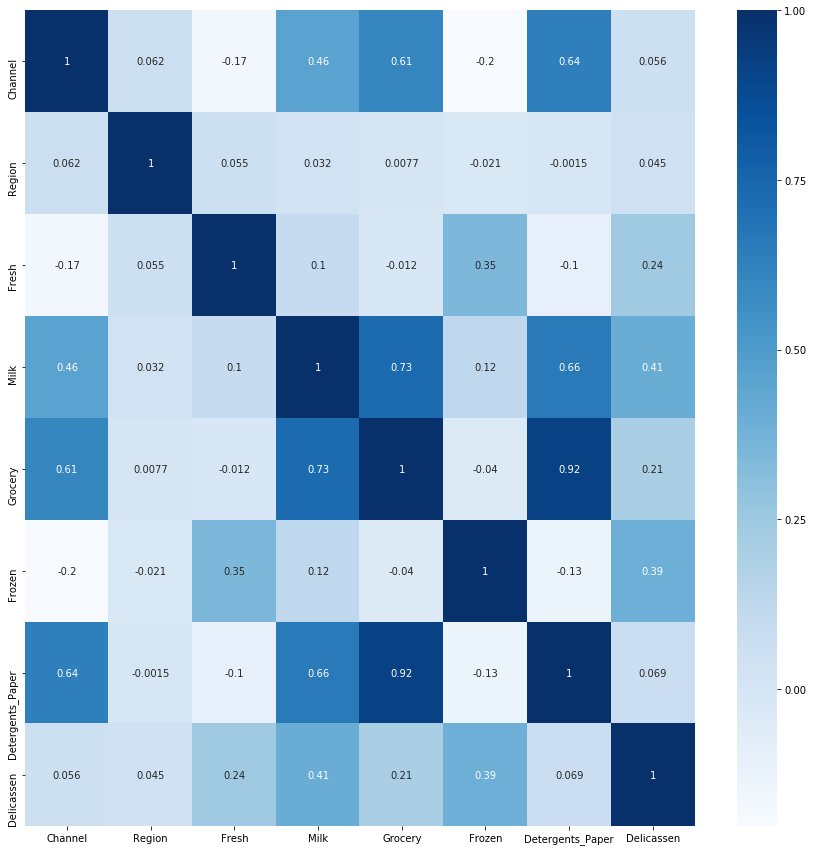

In [7]:
corr_matrix = data.corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [8]:
# Your code here:

grouped_1 = data.groupby('Region').sum()
grouped_1['Sum'] = grouped_1["Fresh"] + grouped_1["Milk"] + grouped_1["Grocery"] + grouped_1["Frozen"] + grouped_1["Detergents_Paper"] + grouped_1["Delicassen"]
grouped_1

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
Region,,,,,,,,
1,95,854833,422454,570037,231026,204136,104327,2386813
2,66,464721,239144,433274,190132,173311,54506,1555088
3,421,3960577,1888759,2495251,930492,890410,512110,10677599


In [9]:
region_sums = list(grouped_1.Sum)

region_1_percentage = (region_sums[0]/sum(region_sums)) * 100
print(f"Percentage of region 1 customers = {region_1_percentage}")

region_2_percentage = (region_sums[1]/sum(region_sums)) * 100
print(f"Percentage of region 2 customers = {region_2_percentage}")

region_3_percentage = (region_sums[2]/sum(region_sums)) * 100
print(f"Percentage of region 3 customers = {region_3_percentage}")

Percentage of region 1 customers = 16.32622866719108
Percentage of region 2 customers = 10.637080611512022
Percentage of region 3 customers = 73.03669072129689


In [10]:
grouped_2 = data.groupby('Channel').sum()
grouped_2['Sum'] = grouped_2["Fresh"] + grouped_2["Milk"] + grouped_2["Grocery"] + grouped_2["Frozen"] + grouped_2["Detergents_Paper"] + grouped_2["Delicassen"]
grouped_2

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
Channel,,,,,,,,
1,748,4015717,1028614,1180717,1116979,235587,421955,7999569
2,371,1264414,1521743,2317845,234671,1032270,248988,6619931


In [11]:
channel_sums = list(grouped_2.Sum)
channel_1_percentage = (channel_sums[0]/sum(channel_sums)) * 100
print(f"Percentage of channel 1 customers = {channel_1_percentage}")

channel_2_percentage = (channel_sums[1]/sum(channel_sums)) * 100
print(f"Percentage of channel 2 customers = {channel_2_percentage}")

Percentage of channel 1 customers = 54.71848558432231
Percentage of channel 2 customers = 45.28151441567769


### From the  above tables and calculation we can clearly see that when it comes to customer channels, both of them are almost the same, which means that the (Pareto principle) is not satisfied.

#### For the sake of curiosity I tried the same thing and method with the region and we can see that region number 3 is responsible for almost 73% of the total retail sales. But the region 3 represents the rest of the regions that are not either Lisbon or porto. So in this case  the (Pareto principle) is not satisfied as well.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

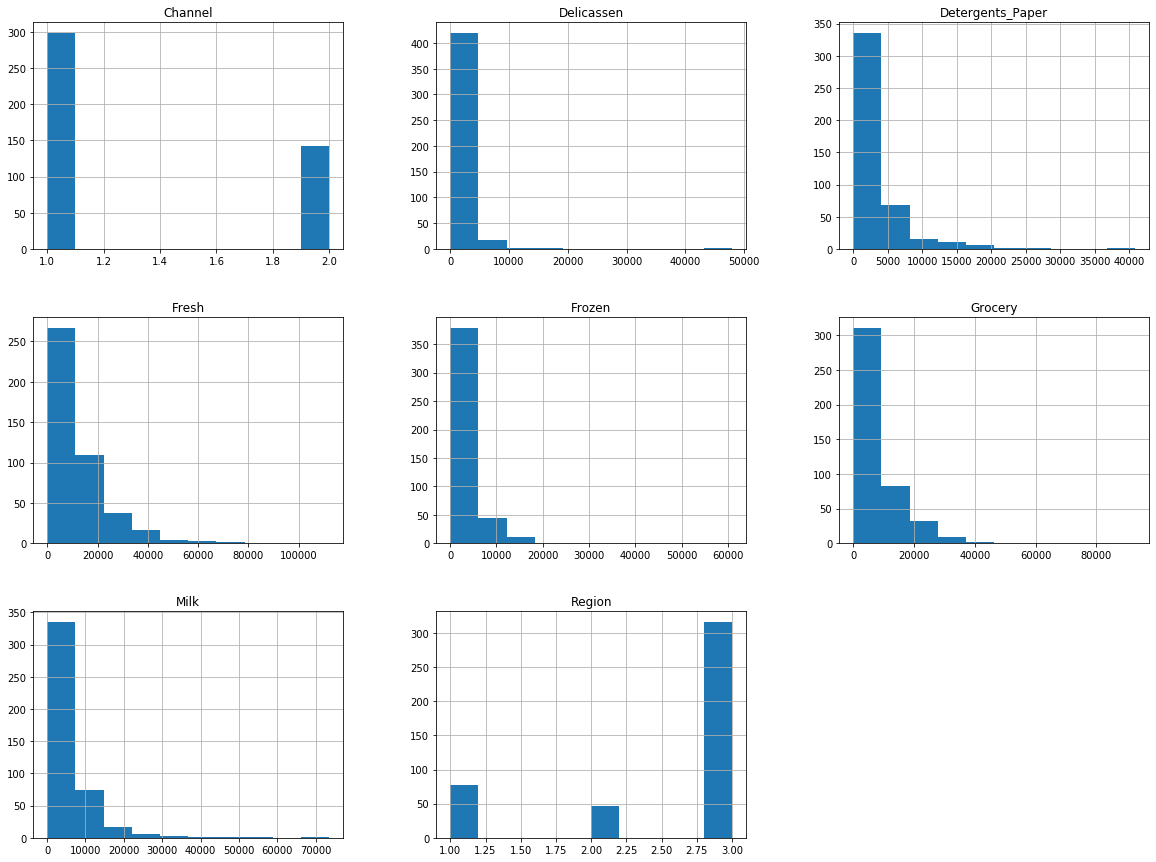

In [12]:
data.hist(figsize=(20,15))
plt.show()

In [13]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [14]:
# Your comment here
"""
The data is relatively clean, there are no nan values, all the columns are numericals.
The only thing that we can see is that the data ranges are remarkably different across various categories,
so we will use 'StandardScaler' to scale the data.
"""

"\nThe data is relatively clean, there are no nan values, all the columns are numericals.\nThe only thing that we can see is that the data ranges are remarkably different across various categories,\nso we will use 'StandardScaler' to scale the data.\n"

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:
#Imported in the first cell

sc = StandardScaler()
customers_scale = pd.DataFrame(columns = list(data.columns), data = sc.fit_transform(data))

In [16]:
customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [17]:
kmeans = KMeans()

customers_scale_cluster = kmeans.fit(customers_scale)

customers_scale['labels'] = customers_scale_cluster.fit_predict(customers_scale)

Count the values in `labels`.

In [18]:
customers_scale['labels'].value_counts()

3    156
1     93
0     84
6     58
7     36
4      6
2      6
5      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [19]:
# Your code here
DBSCAN_clustering = DBSCAN(eps=0.5).fit(customers_scale)

customers_scale['labels_DBSCAN'] = DBSCAN_clustering.fit_predict(customers_scale)

Count the values in `labels_DBSCAN`.

In [20]:
customers_scale['labels_DBSCAN'].unique()

array([-1,  1,  0,  3,  2,  4,  5,  6,  7], dtype=int64)

In [21]:
# Your code here
customers_scale['labels_DBSCAN'].value_counts()

-1    265
 1    120
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

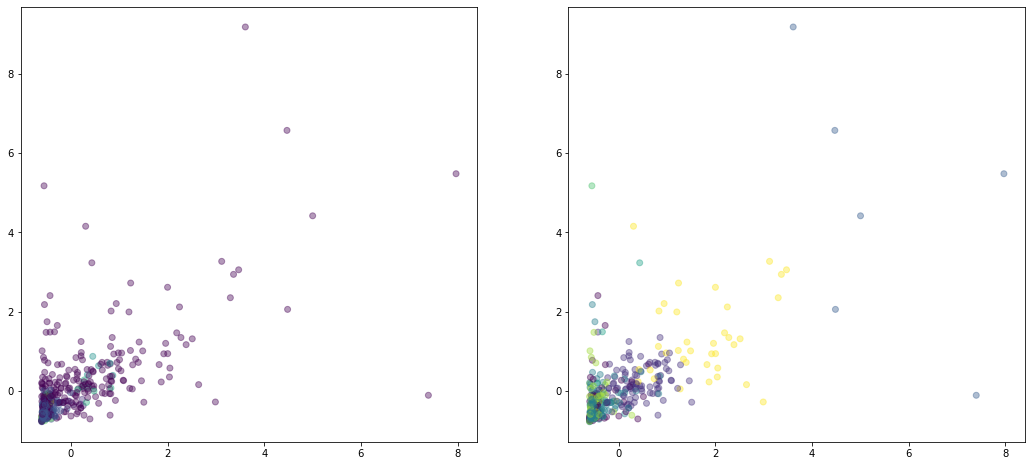

In [22]:
x = customers_scale['Detergents_Paper']
y = customers_scale['Milk']
color1 = customers_scale['labels_DBSCAN']
color2 = customers_scale['labels']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.scatter(x, y, c=color1, alpha=0.4)
ax2.scatter(x, y, c=color2, alpha=0.4)

plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

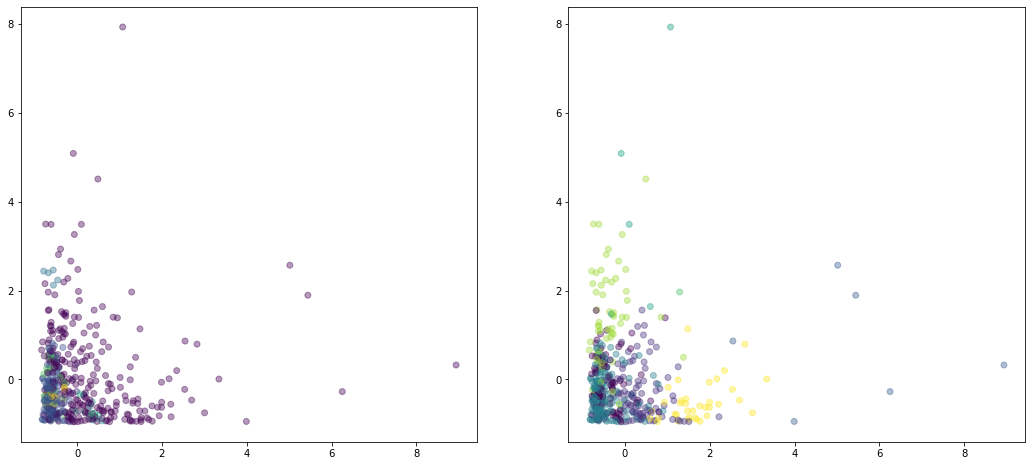

In [23]:
# Your code here:
x = customers_scale['Grocery']
y = customers_scale['Fresh']
color1 = customers_scale['labels_DBSCAN']
color2 = customers_scale['labels']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.scatter(x, y, c=color1, alpha=0.4)
ax2.scatter(x, y, c=color2, alpha=0.4)

plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

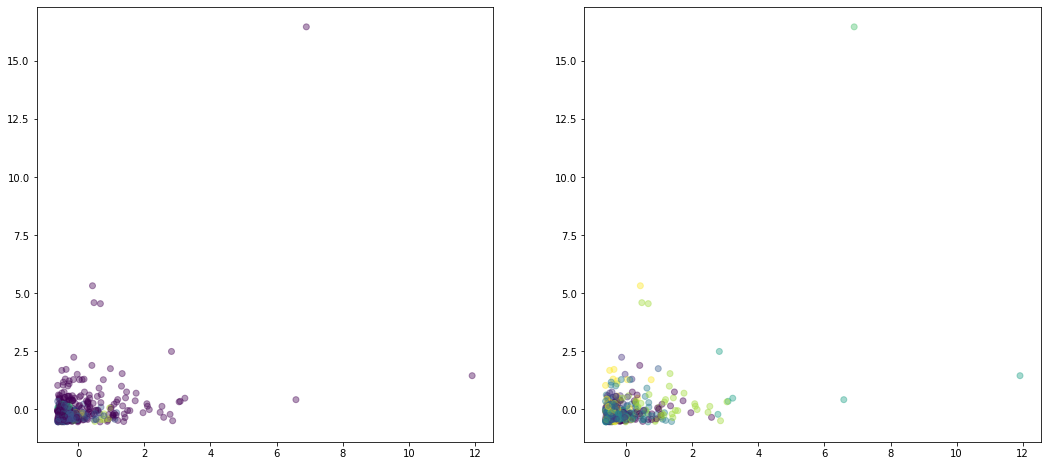

In [24]:
# Your code here:

# f, axes = plt.subplots(2, 1, figsize=(15, 20))
# sns.scatterplot(x='Frozen', y='Delicassen', hue='labels', cmap="RdBu", marker="s", data=customers_scale, ax=axes[0])
# sns.scatterplot(x='Frozen', y='Delicassen', hue='labels_DBSCAN', cmap="RdBu", marker="s", data=customers_scale, ax=axes[1])
# plt.show()


x = customers_scale['Frozen']
y = customers_scale['Delicassen']
color1 = customers_scale['labels_DBSCAN']
color2 = customers_scale['labels']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.scatter(x, y, c=color1, alpha=0.4)
ax2.scatter(x, y, c=color2, alpha=0.4)

plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [25]:
# Your code here:
customers_scale.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,-0.588442,-1.610519,-0.149954,-0.350192,-0.405861,0.015459,-0.419684,-0.158094,1.547619
1,1.448652,0.396022,-0.276402,0.224334,0.367897,-0.353647,0.393264,-0.036920,-0.354839
2,1.448652,0.375167,0.740105,4.600398,5.363637,-0.179261,5.487847,0.344219,-1.000000
3,-0.690297,0.590668,-0.342087,-0.390918,-0.469364,-0.210953,-0.433407,-0.186639,0.538462
4,-0.690297,-0.055834,3.260300,0.653587,0.123491,5.068528,-0.279163,0.828321,-1.000000
5,-0.690297,0.590668,1.966817,5.175503,1.287217,6.900600,-0.554862,16.478447,-1.000000
6,-0.579662,0.390030,1.434885,-0.261768,-0.372834,0.655944,-0.469525,0.171652,-0.741379
7,1.448652,-0.522753,-0.486817,1.333873,1.680917,-0.271711,1.745182,0.343321,-1.000000


In [26]:
customers_scale.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,0.318641,-0.092429,0.165058,0.312225,0.334072,0.155050,0.278221,0.181447,3
0,1.448652,0.590668,-0.047439,-0.306575,-0.128764,-0.484978,0.142681,-0.449668,1
1,-0.690297,0.590668,-0.319863,-0.528610,-0.577674,-0.235651,-0.498630,-0.282664,3
2,-0.690297,0.590668,2.330913,-0.593472,-0.609298,-0.370277,-0.517654,-0.262725,6
3,1.448652,0.590668,-0.763329,0.600725,0.412071,-0.507786,0.608619,-0.337985,1
4,1.448652,0.590668,-0.707052,0.040639,0.253227,-0.428514,0.376715,0.107053,1
5,-0.690297,-1.995342,-0.171174,-0.548618,-0.609922,-0.321448,-0.534924,-0.303818,0
6,-0.690297,-1.995342,-0.409825,-0.522690,-0.587695,0.764752,-0.523890,-0.323478,0
7,-0.690297,-0.702337,-0.356662,-0.577682,-0.481258,-0.102396,-0.557298,-0.207274,0


Which algorithm appears to perform better?

### Both algorithms are performing really well, but when it comes to detecting outliers and grouping them together DBSCAN is better.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [27]:
kmeans = KMeans(n_clusters=4)

customers_scale_cluster = kmeans.fit(customers_scale)

customers_scale['labels'] = customers_scale_cluster.fit_predict(customers_scale)

In [28]:
customers_scale['labels'].value_counts()

0    156
1    138
3    101
2     45
Name: labels, dtype: int64

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [29]:
DBSCAN_clustering = DBSCAN(eps=3, min_samples=2).fit(customers_scale)

customers_scale['labels_DBSCAN'] = DBSCAN_clustering.fit_predict(customers_scale)

In [30]:
customers_scale['labels_DBSCAN'].value_counts()

 0    377
 5     33
 1     12
-1      9
 2      5
 4      2
 3      2
Name: labels_DBSCAN, dtype: int64

### Looking at the scatter plot below, we can clearly see that both algorithms are performing different than before because we reduced the number of clusters. So it is clear to see that we have to keep changing the parameters of the algorithm till we reach an optimal result.

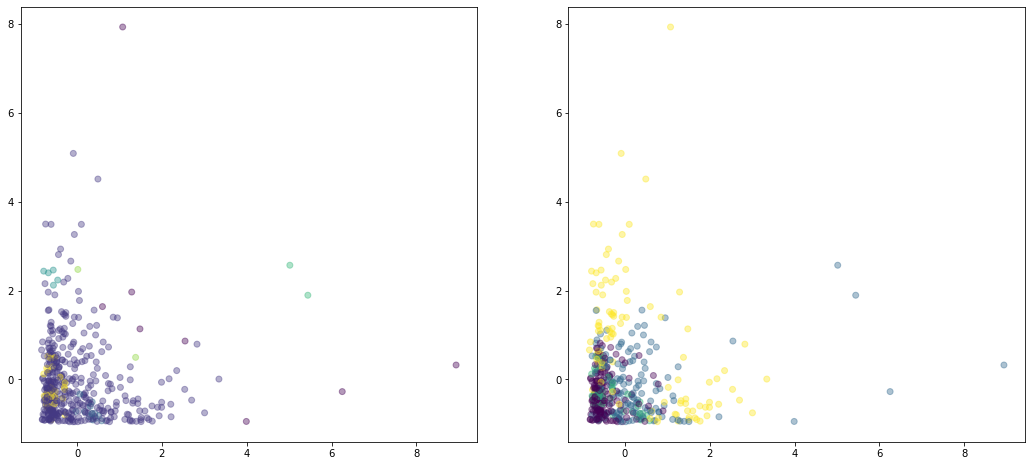

In [31]:
x = customers_scale['Grocery']
y = customers_scale['Fresh']
color1 = customers_scale['labels_DBSCAN']
color2 = customers_scale['labels']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.scatter(x, y, c=color1, alpha=0.4)
ax2.scatter(x, y, c=color2, alpha=0.4)

plt.show()